In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [8]:
def parse_profilometer_xy_data(filename):
    
    

    df_header = pd.read_csv(filename, sep='\s+',header=None, nrows=7 )
    df_header = df_header.T
    df_header.columns = df_header.iloc[0]
    df_header = df_header.reindex(df_header.index.drop(0))
    name = df_header.Data
    x_resolution = df_header['X-Resolution'].astype('float').values
    y_resolution = 0.0001
    x_coord = df_header['X-Coord'].values
    y_coord = df_header['Y-Coord'].values
    
    # Data points
    df = pd.read_csv(filename, sep='\s+',header=0, skiprows=7)

    x = np.arange(len(df.Intermediate))*x_resolution
#     print(x)
    y = df['Normal']*y_resolution
#     plt.plot(x, y, label=file_i)

    return x,y


for d in data:
    filename = filename = d['filename']

    x,y = parse_profilometer_xy_data(filename)
    break
    
    

plt.plot(x,y)

NameError: name 'data' is not defined

In [5]:


path = "GS_Profilometer\\"

files = os.listdir(path)
files = [f for f in files if f.endswith('.txt')]

filename = os.path.join(path, files[0])

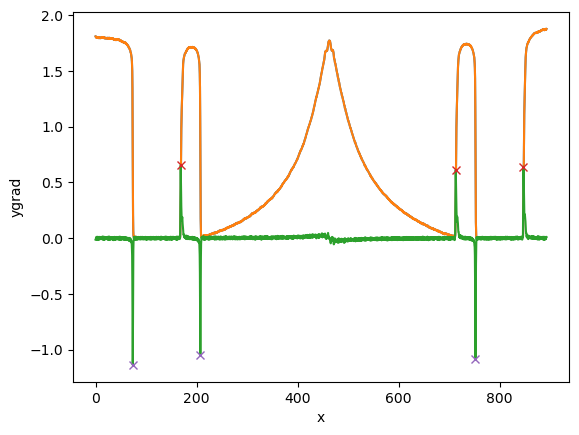

607    -0.004748
608    -0.005686
609    -0.004484
610    -0.002001
611     0.000059
          ...   
3157    0.169798
3158    0.171310
3159    0.172450
3160    0.172143
3161    0.170116
Name: Normal, Length: 2555, dtype: float64


(799.9000000000001, 799.9000000000001)

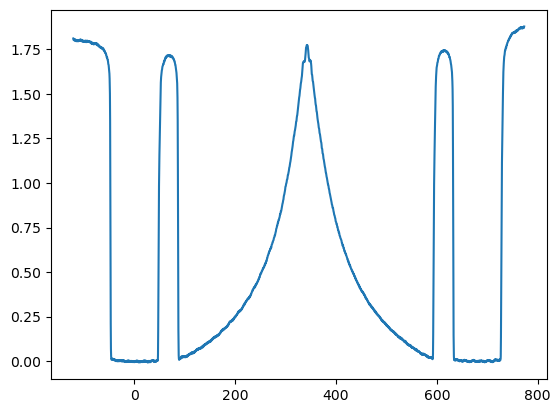

In [77]:
x,y = parse_profilometer_xy_data(filename)
plt.plot(x,y)

from scipy.signal import find_peaks


ygrad = np.gradient(y,x)

peaks, _ = find_peaks(ygrad, prominence=0.5)
valleys, _ = find_peaks(-ygrad, prominence=0.5)
plt.plot(x, y)
plt.plot(x, ygrad)
plt.plot(x[peaks], ygrad[peaks], "x")
plt.plot(x[valleys], ygrad[valleys], "x")
plt.xlabel('x')
plt.ylabel('ygrad')
plt.show()

# determine the left and right coordinates of the peaks


fiducial_left_centroid = np.mean([x[peaks[0]], x[valleys[0]]])
fiducial_right_centroid = np.mean([x[peaks[-1]], x[valleys[-1]]])


plt.figure()


distance_between_fiducial_centroids = 680


x = (x - fiducial_left_centroid) * (distance_between_fiducial_centroids / (fiducial_right_centroid-fiducial_left_centroid))
# normalized_y = (y - np.min(y)) * (780 / (right_coordinate - left_coordinate))
data_start = 0
data_end = data_start + 512

# Extract y values where x is between data_start and data_end
selected_y = y[(x >= data_start) & (x <= data_end)]

# Print the selected y values
print(selected_y)

plt.plot(x,y)

fiducial_right_centroid,fiducial_right_centroid


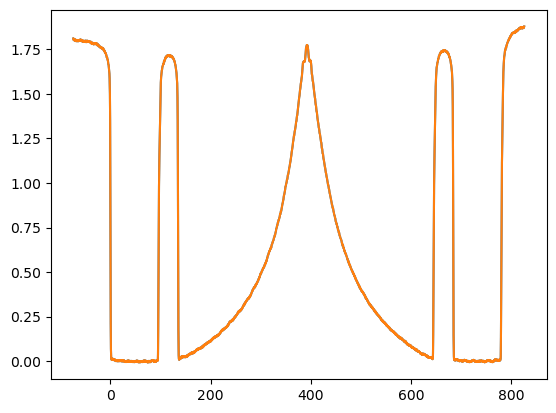

In [71]:
x = (x - left_coordinate) * (780 / (right_coordinate - left_coordinate))
# normalized_y = (y - np.min(y)) * (780 / (right_coordinate - left_coordinate))
data_start = 134
data_end = data_start + 512

# Extract y values where x is between data_start and data_end
selected_y = y[(x >= data_start) & (x <= data_end)]

# Print the selected y values
print(selected_y)

plt.plot(selected_y)

plt.plot(x, y)
plt.plot(x, y)

1034    1.430460
1035    1.354850
1036    1.239070
1037    1.075840
1038    0.873176
          ...   
3569    0.609739
3570    0.710448
3571    0.796253
3572    0.869483
3573    0.934080
Name: Normal, Length: 2540, dtype: float64


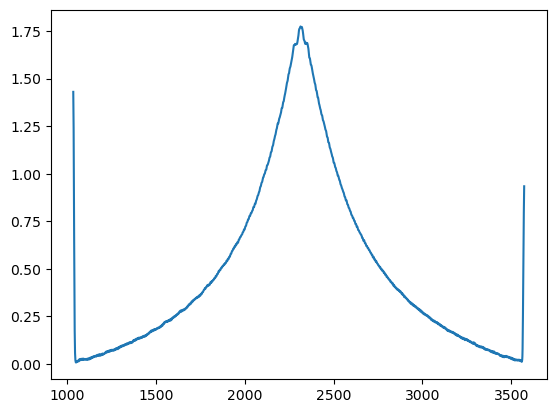

In [72]:
data_start = 134
data_end = data_start + 512

# Extract y values where x is between data_start and data_end
selected_y = y[(x >= data_start) & (x <= data_end)]

# Print the selected y values
print(selected_y)

plt.plot(selected_y)


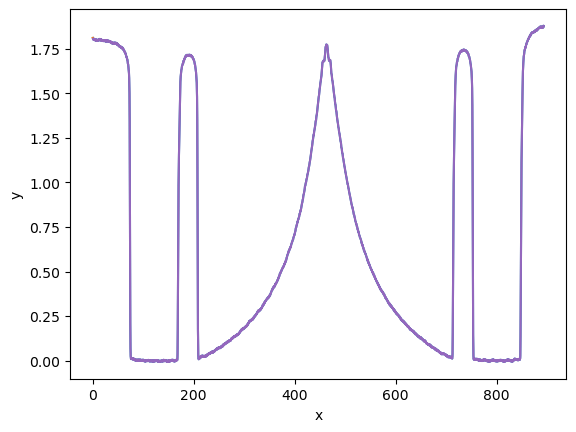

1304

In [43]:
def detect_flat_regions(x, y, threshold):
    # Calculate the differences between consecutive y values
    dy = np.diff(y)
    dy = np.gradient([x,y])
    
    # Find the indices where the differences are below the threshold
    flat_region_indices = np.where(np.abs(dy) <= threshold)[0]
    
    # Split the x and y values into separate regions based on the flat region indices
    regions = []
    start_index = 0
    for index in flat_region_indices:
        region = (x[start_index:index+1], y[start_index:index+1])
        regions.append(region)
        start_index = index + 1
    
    # Add the last region from the last flat region index to the end of the data
    last_region = (x[start_index:], y[start_index:])
    regions.append(last_region)
    
    return regions



plt.plot(x,y)

threshold = 0.001

flat_regions = detect_flat_regions(x, y, threshold)
for region in flat_regions:
    region_x, region_y = region
    plt.plot(region_x, region_y)


plt.xlabel('x')
plt.ylabel('y')
plt.show()
len(flat_regions)


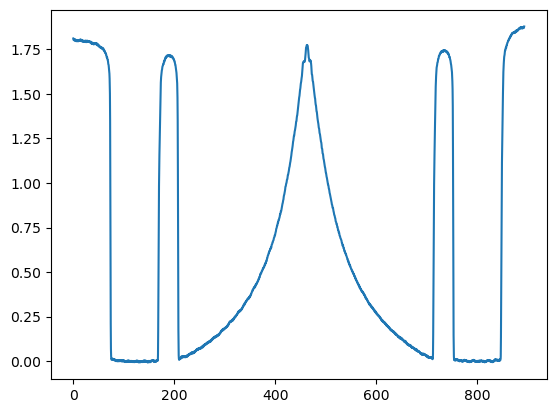

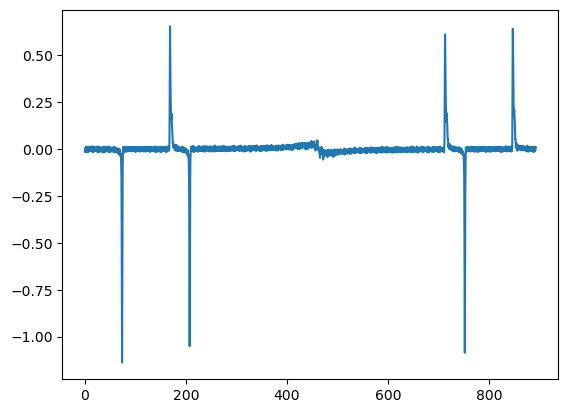

In [50]:
ygrad = np.gradient(y,x)

plt.plot(x,y)
plt.figure()
plt.plot(x,ygrad)



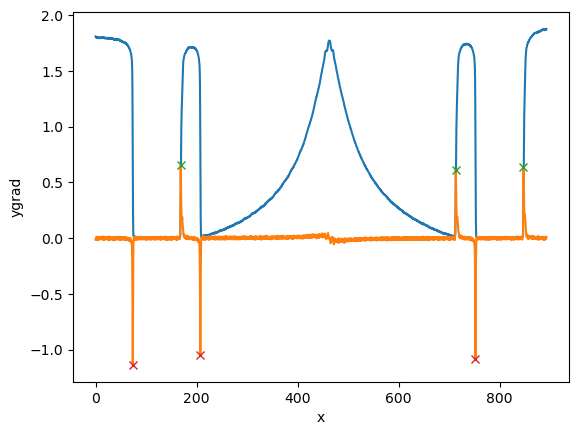

(73.60000000000001, 847.4000000000001)

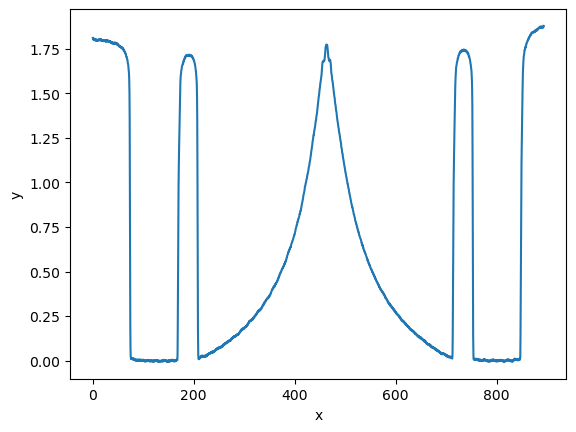

[(array([0.000e+00, 2.000e-01, 4.000e-01, ..., 8.926e+02, 8.928e+02,
         8.930e+02]),
  1       1.81099
  2       1.80825
  3       1.80513
  4       1.80245
  5       1.80187
           ...   
  4462    1.87000
  4463    1.87118
  4464    1.87374
  4465    1.87616
  4466    1.87833
  Name: Normal, Length: 4466, dtype: float64)]

In [24]:
def detect_regions(x, y, threshold):
    # Calculate the differences between consecutive x and y values
    dx = np.diff(x)
    dy = np.diff(y)
    
    # Find the indices where the differences exceed the threshold
    sharp_variation_indices = np.where((np.abs(dx) > threshold) | (np.abs(dy) > threshold))[0]
    
    # Split the x and y values into separate regions based on the sharp variation indices
    regions = []
    start_index = 0
    for index in sharp_variation_indices:
        region = (x[start_index:index+1], y[start_index:index+1])
        regions.append(region)
        start_index = index + 1
    
    # Add the last region from the last sharp variation index to the end of the data
    last_region = (x[start_index:], y[start_index:])
    regions.append(last_region)
    
    return regions
# x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# y = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3, 1])
threshold = 0.5

regions = detect_regions(x, y, threshold)
for region in regions:
    region_x, region_y = region
    plt.plot(region_x, region_y)

plt.xlabel('x')
plt.ylabel('y')
plt.show()
regions